In [1]:
import os
import numpy as np
from os.path import isfile

from fastai.vision.all import *

import seaborn as sns

# from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
npz_file = np.load('input/shuffled_train.npz')

X_train = npz_file['arr_0'] # get array from the first file 
y_train = npz_file['arr_1'] # get array from the second file

print(X_train.shape, y_train.shape)
print(X_train[0])
print(y_train[0])

(6394, 640, 128) (6394, 8)
[[ -5.16850536  -4.31890804  -4.77122094 ... -18.42068074 -18.42068074
  -18.42068074]
 [ -2.48283322  -2.07804404  -4.08614045 ... -18.42068074 -18.42068074
  -18.42068074]
 [ -2.49017317  -1.37799711  -1.68048832 ... -12.72401852 -14.37600593
  -16.06189915]
 ...
 [-18.42068074 -18.42068074 -18.42068074 ... -18.42068074 -18.42068074
  -18.42068074]
 [-18.42068074 -18.42068074 -18.42068074 ... -18.42068074 -18.42068074
  -18.42068074]
 [-13.03971004 -10.76111878  -9.74584907 ... -14.56515575 -16.74693547
  -18.42068074]]
[1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
npz_valid_file = np.load('input/shuffled_valid.npz')

X_valid = npz_valid_file['arr_0']
y_valid = npz_valid_file['arr_1']

print(X_valid.shape, y_valid.shape)
print(X_valid[0])
print(y_valid[0])

(800, 640, 128) (800, 8)
[[ -7.52773372  -7.07302297  -7.13632417 ... -17.21551444 -18.42068074
  -18.42068074]
 [ -6.68254481  -4.10279465  -1.77462616 ... -14.50561104 -16.13628929
  -18.42068074]
 [-10.00745455  -4.66620972  -1.69349652 ... -14.79143959 -16.29503197
  -18.42068074]
 ...
 [ -8.30887068  -8.00224235  -5.84288788 ... -14.52635066 -16.49676518
  -18.42068074]
 [ -8.91541544  -7.94720273  -5.05552613 ... -15.35461841 -16.94068164
  -18.42068074]
 [ -8.72121266  -8.120174    -5.69182602 ... -14.82019335 -16.26787683
  -18.42068074]]
[0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
genres_dict = {
    'Electronic': 0, 
    'Experimental': 1, 
    'Folk': 2, 
    'Hip-Hop': 3, 
    'Instrumental': 4,
    'International': 5, 
    'Pop': 6, 
    'Rock': 7  
}

reverse_genres_dic = {v: k for k, v in genres_dict.items()}

def make_dataloaders_from_numpy_data(image, label):

    def get_x(i):
        return(image[i])

    def get_y(i):
        for idx, x in enumerate(label[i]):
            if (x == 1.0):
                genre = reverse_genres_dic[idx]
                return(genre)    

    dblock = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_x=get_x,
        get_y=get_y)

    # pass in a list of index
    num_images = image.shape[0]
    dls = dblock.dataloaders(list(range(num_images)))

    print(dls.train.vocab)

    return dls

dls = make_dataloaders_from_numpy_data(X_train, y_train)

['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']


In [ ]:
precision = Precision(average="macro")
recall = Recall(average="macro")
f1_score = F1Score(average="macro")
learner = vision_learner(dls, models.resnet50, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, precision, recall, f1_score])

In [ ]:
learner.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,2.326291,1.856797,0.451487,0.444001,0.454870,0.441654,40:43


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.672981,1.485596,0.537559,0.539678,0.539833,0.534406,47:50


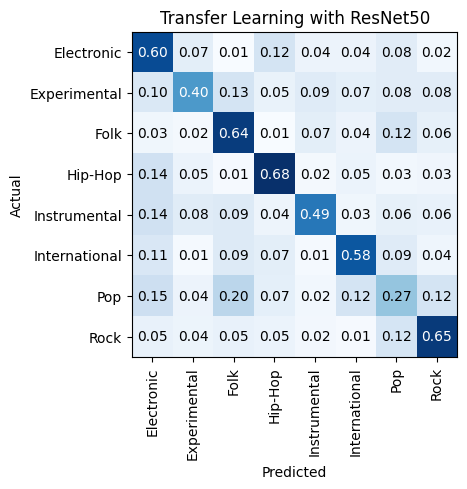

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(title="Transfer Learning with ResNet50", normalize=True)